In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Movie_Recommendation_System").getOrCreate()
sc = spark.sparkContext
sc

<SparkContext master=local[*] appName=Movie_Recommendation_System>

In [2]:
import socket
import platform

# Get computer name
computer_name = socket.gethostname()

# Get IP address
ip_address = socket.gethostbyname(computer_name)

# Get computer configuration
computer_config = platform.uname()

print(f"Computer Name: {computer_name}")
print(f"IP Address: {ip_address}")
print(f"Computer Configuration: {computer_config}")

Computer Name: MSI
IP Address: 172.17.15.51
Computer Configuration: uname_result(system='Windows', node='MSI', release='10', version='10.0.19041', machine='AMD64', processor='Intel64 Family 6 Model 141 Stepping 1, GenuineIntel')


In [3]:
movie_data = sc.textFile("movies.txt")
movie_data.take(5)

['tt1745960,Top Gun: Maverick,"[\'Action\', \'Drama\']",2022',
 'tt8041270,Jurassic World Dominion,"[\'Action\', \'Adventure\', \'Sci-Fi\']",2022',
 'tt0092099,Top Gun,"[\'Action\', \'Drama\']",1986',
 'tt9783600,Spiderhead,"[\'Action\', \'Crime\', \'Drama\']",2022',
 'tt6710474,Everything Everywhere All at Once,"[\'Action\', \'Adventure\', \'Comedy\']",2022']

In [4]:
num_movies = movie_data.count()
print("Number of movies: ", num_movies)

Number of movies:  1353


In [5]:
years = movie_data.map(lambda x: x.split(",")[-1])
print("Years: ", years.take(10))

Years:  ['2022', '2022', '1986', '2022', '2022', '2022', 'TV Series', '2022', '1993', '2022']


In [6]:
years = years.filter(lambda x: x.isdigit())
movie_age = years.map(lambda x: 2024 - int(x)).countByValue()
print("Movie Age: ", movie_age)
values = list(movie_age.values())
bins = list(movie_age.keys())
print("Values: ", values)
print("Bins: ", bins)

Movie Age:  defaultdict(<class 'int'>, {2: 37, 38: 14, 31: 11, 3: 39, 9: 36, 6: 54, 27: 28, 40: 18, 23: 27, 47: 3, 5: 54, 21: 28, 28: 16, 25: 18, 16: 41, 7: 47, 14: 35, 19: 34, 1: 14, 35: 13, 13: 42, 29: 19, 15: 34, 10: 42, 24: 18, 22: 24, 4: 28, 41: 8, 12: 37, 11: 42, 36: 12, 18: 29, 8: 58, 42: 10, 37: 17, 17: 30, 33: 12, 20: 30, 30: 17, 26: 22, 34: 20, 32: 13, 46: 2, 62: 3, 48: 3, 45: 8, 44: 8, 39: 14, 60: 1, 43: 5, 56: 2, 53: 6, 50: 5, 65: 1, 51: 5, 61: 2, 59: 1, 55: 3, 89: 1, 57: 3, 52: 3, 63: 1, 109: 1, 58: 1, 71: 1, 49: 1, 54: 1, 87: 1})
Values:  [37, 14, 11, 39, 36, 54, 28, 18, 27, 3, 54, 28, 16, 18, 41, 47, 35, 34, 14, 13, 42, 19, 34, 42, 18, 24, 28, 8, 37, 42, 12, 29, 58, 10, 17, 30, 12, 30, 17, 22, 20, 13, 2, 3, 3, 8, 8, 14, 1, 5, 2, 6, 5, 1, 5, 2, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1]
Bins:  [2, 38, 31, 3, 9, 6, 27, 40, 23, 47, 5, 21, 28, 25, 16, 7, 14, 19, 1, 35, 13, 29, 15, 10, 24, 22, 4, 41, 12, 11, 36, 18, 8, 42, 37, 17, 33, 20, 30, 26, 34, 32, 46, 62, 48, 45, 44, 39, 60, 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

bins =np.sort(bins)
print("Bins: ", bins)

Bins:  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  65  71  87  89 109]


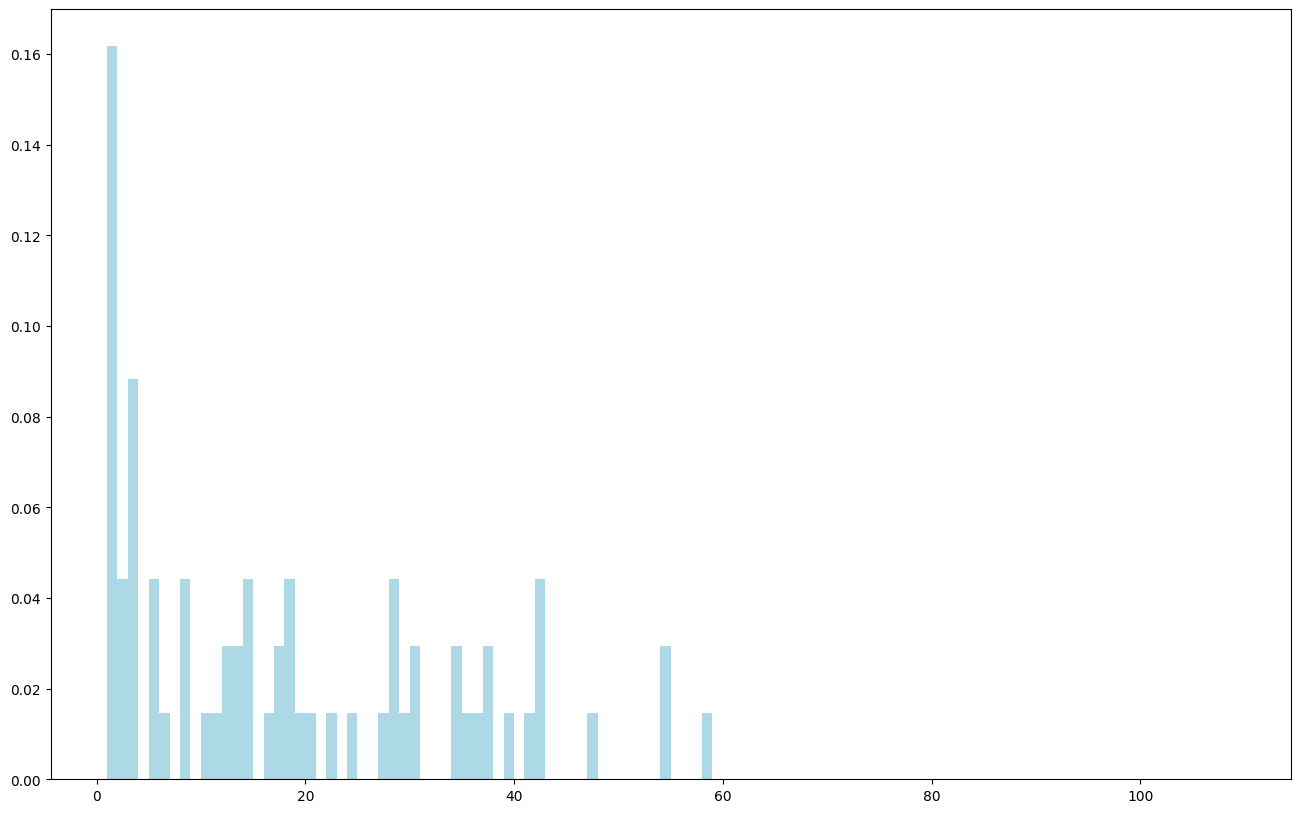

In [8]:
plt.hist(values, bins=bins, color='lightblue',density=True)
fig = plt.gcf()
fig.set_size_inches(16, 10)

In [9]:
ratings_data = sc.textFile("users.txt")
ratings_data.count()

31314

In [10]:
ratings_data.first()

'ur82692553,pucciarello,rw8183145,tt1745960,9'

In [11]:
ratings_data = ratings_data.map(lambda x: x.split(","))
ratings_data.take(5)

[['ur82692553', 'pucciarello', 'rw8183145', 'tt1745960', '9'],
 ['ur93656484', 'nihal-38544', 'rw8173474', 'tt1745960', '9'],
 ['ur49400835', 'r96sk', 'rw8174934', 'tt1745960', '9'],
 ['ur82936063', 'scottedwards-87359', 'rw8177338', 'tt1745960', '10'],
 ['ur83295852', 'lovefalloutkindagamer', 'rw8177954', 'tt1745960', '10']]

In [12]:

ratings = ratings_data.map(lambda x: int(x[4]))

print("Ratings: ", ratings.take(10))


Ratings:  [9, 9, 9, 10, 10, 10, 10, 10, 10, 7]


In [13]:
avr_rating = ratings.reduce(lambda x, y: x + y) / ratings.count()
print("Average Rating: ", avr_rating)

Average Rating:  6.327361563517916


In [14]:
ratings_list = ratings.collect()
print("Ratings List: ", ratings_list)


Ratings List:  [9, 9, 9, 10, 10, 10, 10, 10, 10, 7, 10, 7, 10, 10, 9, 9, 10, 10, 6, 8, 6, 5, 10, 10, 10, 6, 5, 5, 6, 6, 2, 6, 1, 7, 3, 8, 7, 3, 7, 7, 2, 6, 4, 6, 2, 8, 7, 2, 7, 7, 8, 7, 6, 7, 9, 7, 9, 6, 8, 7, 7, 6, 7, 9, 6, 10, 7, 8, 7, 5, 6, 6, 6, 7, 5, 6, 5, 6, 5, 8, 7, 4, 7, 6, 3, 6, 1, 7, 2, 10, 7, 3, 6, 7, 9, 9, 9, 10, 10, 9, 8, 6, 10, 6, 9, 6, 2, 10, 9, 10, 9, 6, 10, 6, 10, 6, 9, 5, 7, 5, 7, 6, 3, 8, 7, 3, 9, 7, 4, 7, 6, 6, 3, 8, 6, 3, 8, 6, 4, 6, 6, 10, 6, 5, 7, 6, 6, 6, 2, 8, 7, 5, 8, 6, 2, 6, 7, 6, 5, 8, 7, 4, 9, 6, 5, 7, 9, 9, 9, 10, 10, 10, 10, 10, 10, 7, 9, 7, 4, 9, 10, 10, 9, 10, 8, 7, 10, 7, 4, 7, 6, 6, 6, 7, 9, 6, 8, 6, 5, 8, 6, 2, 6, 6, 8, 7, 8, 7, 4, 9, 7, 4, 7, 6, 7, 8, 8, 6, 10, 7, 8, 6, 9, 7, 8, 6, 4, 6, 8, 7, 9, 6, 10, 7, 9, 6, 5, 7, 9, 8, 7, 10, 10, 9, 10, 6, 10, 6, 10, 6, 5, 10, 9, 8, 6, 10, 6, 10, 6, 2, 10, 10, 10, 7, 7, 7, 6, 6, 7, 10, 7, 10, 6, 8, 6, 4, 6, 6, 6, 9, 6, 10, 6, 10, 6, 3, 6, 5, 5, 5, 7, 7, 6, 4, 8, 7, 1, 10, 7, 3, 7, 7, 7, 1, 9, 7, 1, 10, 7, 5, 7

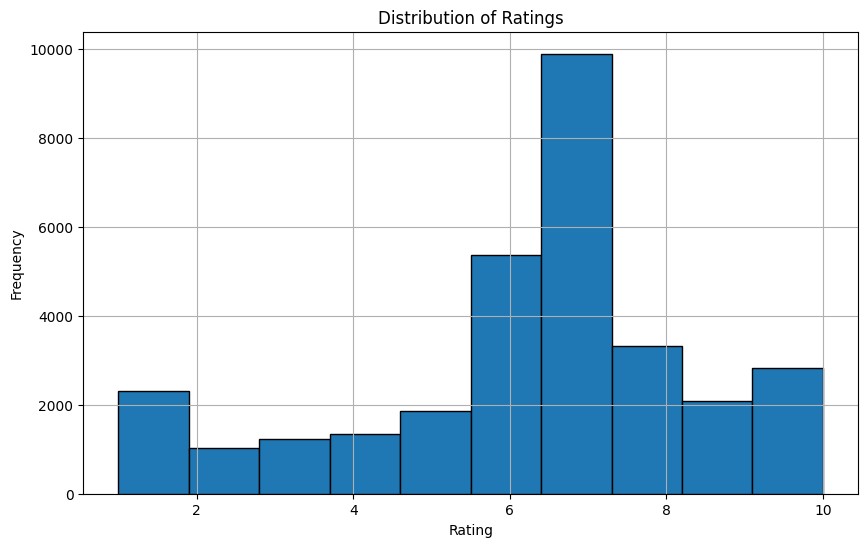

In [15]:
# Matplotlib ile histogram çiz
plt.figure(figsize=(10, 6))
plt.hist(ratings_list, bins=10, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [16]:
data = spark.read.csv("imdb_users_ratings_1500.csv", header=True, inferSchema=True)

In [17]:
data.show(5)

+---------+-----------------+-------------------+------------+--------------------+----------+---------+------+
| Movie ID|      Movie Title|              Genre|Release Year|           User Name|   User ID|Review ID|Rating|
+---------+-----------------+-------------------+------------+--------------------+----------+---------+------+
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|         pucciarello|ur82692553|rw8183145|     9|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|         nihal-38544|ur93656484|rw8173474|     9|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|               r96sk|ur49400835|rw8174934|     9|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|  scottedwards-87359|ur82936063|rw8177338|    10|
|tt1745960|Top Gun: Maverick|['Action', 'Drama']|        2022|lovefalloutkindag...|ur83295852|rw8177954|    10|
+---------+-----------------+-------------------+------------+--------------------+----------+---------+

In [18]:
groupby_data=data.groupBy("Movie ID")

In [19]:
from pyspark.sql.functions import col, desc


groupby_sorted_data=groupby_data.agg({"Rating":"mean"}).orderBy(desc("avg(Rating)"))
popular=groupby_sorted_data.groupBy("avg(Rating)").count()
popular=popular.orderBy(desc("avg(Rating)"))
popular.show(10)
groupby_sorted_data.show(10)

+-----------------+-----+
|      avg(Rating)|count|
+-----------------+-----+
|             10.0|    3|
|             9.65|    1|
|9.304347826086957|    1|
|9.181818181818182|    1|
|9.173913043478262|    1|
|9.130434782608695|    1|
|             9.12|    1|
|9.083333333333334|    1|
|              9.0|    3|
|             8.96|    1|
+-----------------+-----+
only showing top 10 rows

+---------+-----------------+
| Movie ID|      avg(Rating)|
+---------+-----------------+
|tt1113851|             10.0|
|tt1273198|             10.0|
|tt1031445|             10.0|
|tt6019206|             9.65|
|tt0167260|9.304347826086957|
|tt0133093|9.181818181818182|
|tt0103064|9.173913043478262|
|tt0120737|9.130434782608695|
|tt9362722|             9.12|
|tt0468569|9.083333333333334|
+---------+-----------------+
only showing top 10 rows



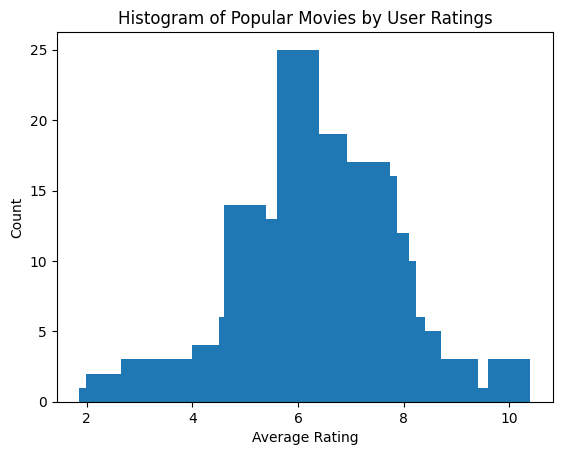

In [20]:
import matplotlib.pyplot as plt

# Extract the ratings and counts from the DataFrame
ratings = popular.select("avg(Rating)").rdd.flatMap(lambda x: x).collect()
counts = popular.select("count").rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.bar(ratings, counts)
plt.xlabel("Average Rating")
plt.ylabel("Count")
plt.title("Histogram of Popular Movies by User Ratings")
plt.show()

In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.feature import StringIndexer
from pyspark.sql.functions import col 


# Convert User ID and Movie ID to numerical indices using StringIndexer
user_indexer = StringIndexer(inputCol="User ID", outputCol="user_index")
movie_indexer = StringIndexer(inputCol="Movie ID", outputCol="movie_index")

# Fit the indexers and transform the data
spark_df = user_indexer.fit(data).transform(data)
spark_df = movie_indexer.fit(spark_df).transform(spark_df)  # Apply movie_indexer on the DataFrame with "user_index"

# Split the data into train and test sets
train, test = spark_df.randomSplit([0.7, 0.3], seed=5020)  # Example seed, replace with your own

# Define ALS model
als = ALS(userCol="user_index", itemCol="movie_index", ratingCol="Rating", coldStartStrategy="drop")

# Initialize evaluators
rmse_evaluator = RegressionEvaluator(metricName="rmse", labelCol="Rating", predictionCol="prediction")
mse_evaluator = RegressionEvaluator(metricName="mse", labelCol="Rating", predictionCol="prediction")

# Manually set and evaluate parameters
parameters = [
    {"rank": 10, "maxIter": 10, "lambda": 0.01},
    {"rank": 10, "maxIter": 10, "lambda": 0.1},
    {"rank": 50, "maxIter": 10, "lambda": 0.01},
    {"rank": 50, "maxIter": 10, "lambda": 0.1},
    {"rank": 200, "maxIter": 10, "lambda": 0.01},
    {"rank": 200, "maxIter": 10, "lambda": 0.1},
    {"rank": 10, "maxIter": 50, "lambda": 0.1},
    {"rank": 50, "maxIter": 50, "lambda": 0.01},
    {"rank": 50, "maxIter": 50, "lambda": 0.1},
    {"rank": 200, "maxIter": 50, "lambda": 0.01},
    {"rank": 200, "maxIter": 50, "lambda": 0.1}


    # Add more parameter combinations as needed
]

best_model = None
best_rmse = float("inf")
best_mse = float("inf")

for params in parameters:
    als.setParams(rank=params["rank"], maxIter=params["maxIter"], lambda=params["lambda"])
    model = als.fit(train)
    predictions = model.transform(test)
    rmse = rmse_evaluator.evaluate(predictions)
    mse = mse_evaluator.evaluate(predictions)
    print(f"Model with rank={params['rank']}, maxIter={params['maxIter']}, lambda={params['lambda']} has RMSE={rmse} and MSE={mse}")
    if rmse < best_rmse:
        best_model = model
        best_rmse = rmse
        best_mse = mse

print(f"Best model has RMSE={best_rmse} and MSE={best_mse}")

SyntaxError: invalid syntax (4183862877.py, line 49)